In [68]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [137]:
np.amax(X_train)

255

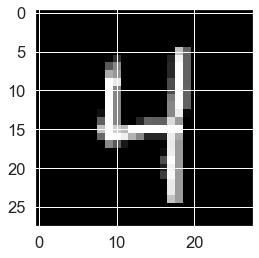

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 196,  99,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [129]:
image = X_train[92]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

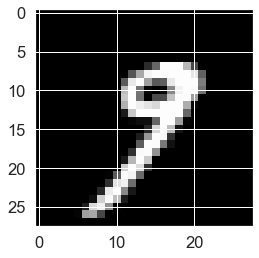

In [106]:
image = X_train[33]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [71]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

import numpy as np
print(X_train.shape)
print(Y_train.shape)
X_Train = np.reshape(X_train, (60000,784))
print(X_Train.shape)

(60000, 28, 28)
(60000,)
(60000, 784)


In [72]:
# Utility function to visualize the outputs of t-SNE

def digit_scatter(x, labels):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[labels.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):
        # Position of each label at median of data points.
        xtext, ytext = np.median(x[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [73]:
# Subset first 5k data points to visualize
x_subset = X_Train[0:5000]
y_subset = Y_train[0:5000]

print(np.unique(y_subset))

##so we know all 10 classes are covered by the 5k samples
print(x_subset.shape)
len(y_subset)

[0 1 2 3 4 5 6 7 8 9]
(5000, 784)


5000

t-SNE done! Time elapsed: 71.52145576477051 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(-3.1056893, -5.8259454, '0'),
  Text(4.9614244, -2.627449, '1'),
  Text(-36.577534, -2.4029303, '2'),
  Text(11.843955, -20.547009, '3'),
  Text(14.452514, -4.2684274, '4'),
  Text(-8.532932, 9.212272, '5'),
  Text(-10.123463, -0.71895707, '6'),
  Text(13.3937845, 5.9472027, '7'),
  Text(16.80428, 7.3601584, '8'),
  Text(-6.89697, 2.5256076, '9')])

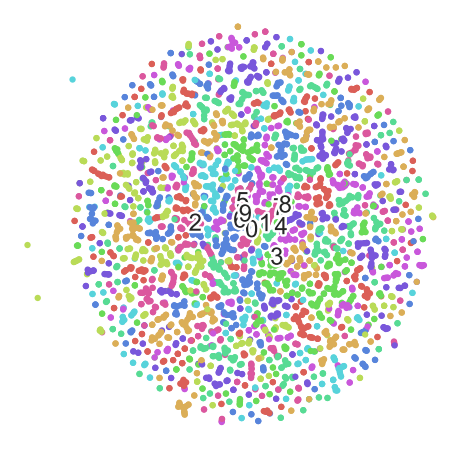

In [120]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

tsne = TSNE(perplexity=1).fit_transform(x_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
tsne1
digit_scatter(tsne, y_subset)

t-SNE done! Time elapsed: 65.31428456306458 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(-67.949936, -28.922537, '0'),
  Text(23.946978, 60.75952, '1'),
  Text(-10.957181, -20.84262, '2'),
  Text(-49.105198, 23.527884, '3'),
  Text(71.91066, -37.910778, '4'),
  Text(-51.125328, 60.219883, '5'),
  Text(-17.414732, -74.54468, '6'),
  Text(38.129517, 0.93608505, '7'),
  Text(-11.219435, 42.996574, '8'),
  Text(60.822163, -12.907503, '9')])

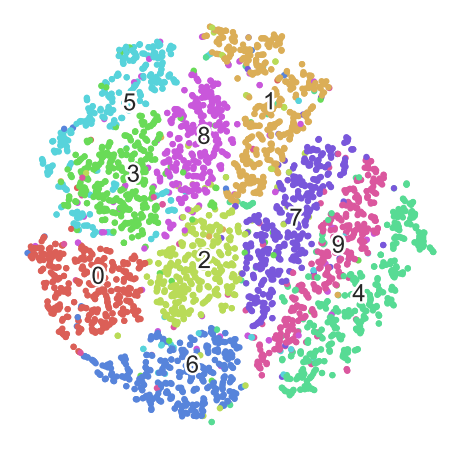

In [121]:
time_start = time.time()

tsne1 = TSNE(perplexity=5).fit_transform(x_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
tsne1
digit_scatter(tsne1, y_subset)

t-SNE done! Time elapsed: 66.71158838272095 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(3.9412353, 80.035484, '0'),
  Text(52.194088, -52.30705, '1'),
  Text(43.708687, -7.754913, '2'),
  Text(6.6663265, 27.631039, '3'),
  Text(-65.40668, -16.379505, '4'),
  Text(-38.681778, 45.289528, '5'),
  Text(58.67149, 46.52611, '6'),
  Text(-24.636957, -70.33034, '7'),
  Text(-4.81695, -4.61316, '8'),
  Text(-35.417686, -22.872341, '9')])

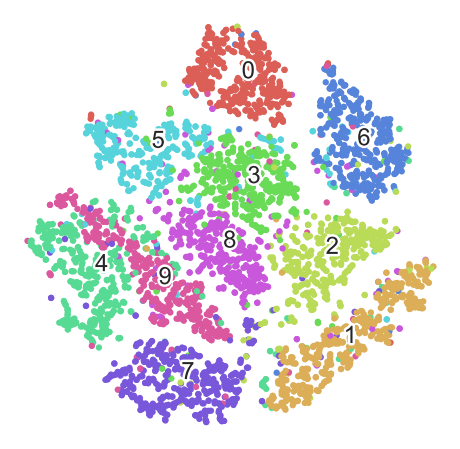

In [122]:
time_start = time.time()
tsne2 = TSNE(perplexity=10).fit_transform(x_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
tsne2
digit_scatter(tsne2, y_subset)

t-SNE done! Time elapsed: 73.68190026283264 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(4.874182, -32.817577, '0'),
  Text(-11.683184, 6.669967, '1'),
  Text(-28.692604, -6.0995893, '2'),
  Text(-7.894784, -17.587027, '3'),
  Text(9.7644005, 20.881254, '4'),
  Text(8.653479, -5.249031, '5'),
  Text(23.275398, -14.397859, '6'),
  Text(-7.572316, 30.160826, '7'),
  Text(-9.55304, -4.1310225, '8'),
  Text(3.625483, 16.111258, '9')])

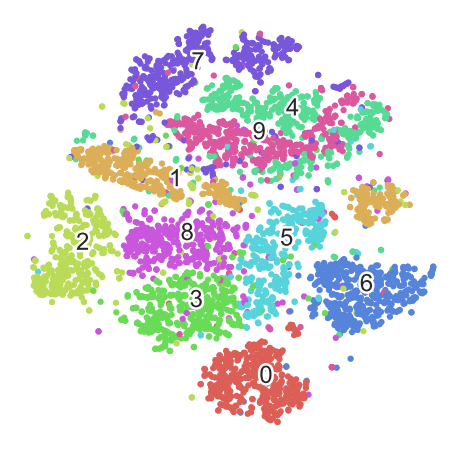

In [123]:
time_start = time.time()
tsne2 = TSNE(perplexity=25, learning_rate=10).fit_transform(x_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
tsne2
digit_scatter(tsne2, y_subset)

t-SNE done! Time elapsed: 48.45642638206482 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(1.6489823, -0.40586865, '0'),
  Text(-0.57907784, -0.58576846, '1'),
  Text(-0.18563662, -0.7283587, '2'),
  Text(0.45667556, -0.37730035, '3'),
  Text(-0.6851244, 0.77694786, '4'),
  Text(0.40103647, -0.014419354, '5'),
  Text(1.0869546, 0.44803664, '6'),
  Text(-1.0145047, 0.45645902, '7'),
  Text(0.0021922677, -0.33984846, '8'),
  Text(-0.7256954, 0.6161006, '9')])

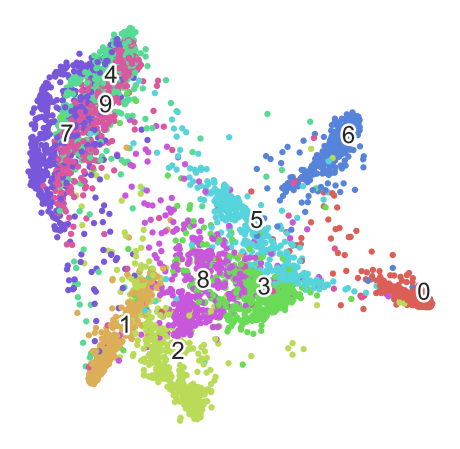

In [124]:
time_start = time.time()
tsne2 = TSNE(perplexity=25, n_iter=250).fit_transform(x_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
tsne2
digit_scatter(tsne2, y_subset)

t-SNE done! Time elapsed: 82.61799740791321 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(60.819843, 36.278072, '0'),
  Text(-17.375494, -56.44842, '1'),
  Text(16.659597, -42.838367, '2'),
  Text(19.80675, 4.56715, '3'),
  Text(-42.552486, 34.075134, '4'),
  Text(14.106063, 39.666, '5'),
  Text(66.346565, -13.859436, '6'),
  Text(-65.37773, -7.628325, '7'),
  Text(-8.825118, -3.2918096, '8'),
  Text(-36.22137, 14.2213335, '9')])

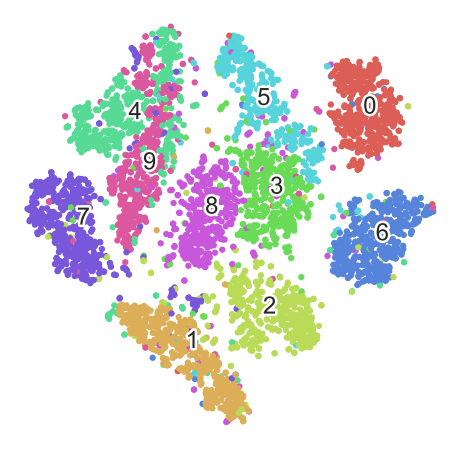

In [125]:
time_start = time.time()
tsne3 = TSNE(perplexity=25).fit_transform(x_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
tsne3
digit_scatter(tsne3, y_subset)

t-SNE done! Time elapsed: 80.66920757293701 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(10.780077, 64.63007, '0'),
  Text(13.378955, -33.499413, '1'),
  Text(39.076836, -28.41404, '2'),
  Text(33.8327, 19.604431, '3'),
  Text(-41.71454, -6.551318, '4'),
  Text(3.0551395, 17.16165, '5'),
  Text(-17.32858, 40.065655, '6'),
  Text(-30.102009, -44.021633, '7'),
  Text(26.574585, -0.6072024, '8'),
  Text(-28.78959, -11.414239, '9')])

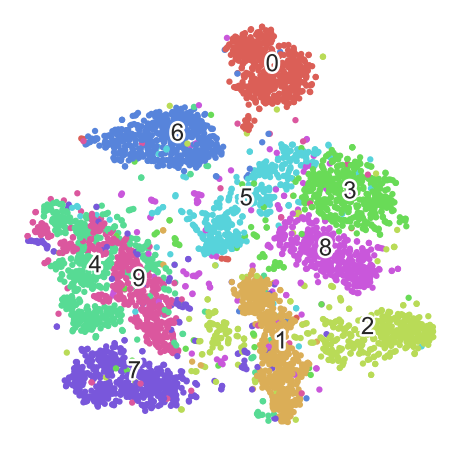

In [126]:
time_start = time.time()
tsne4 = TSNE(perplexity=50).fit_transform(x_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
tsne4
digit_scatter(tsne4, y_subset)